# 2.3 Полносвязные сети. Функции активации

In [236]:
import numpy as np

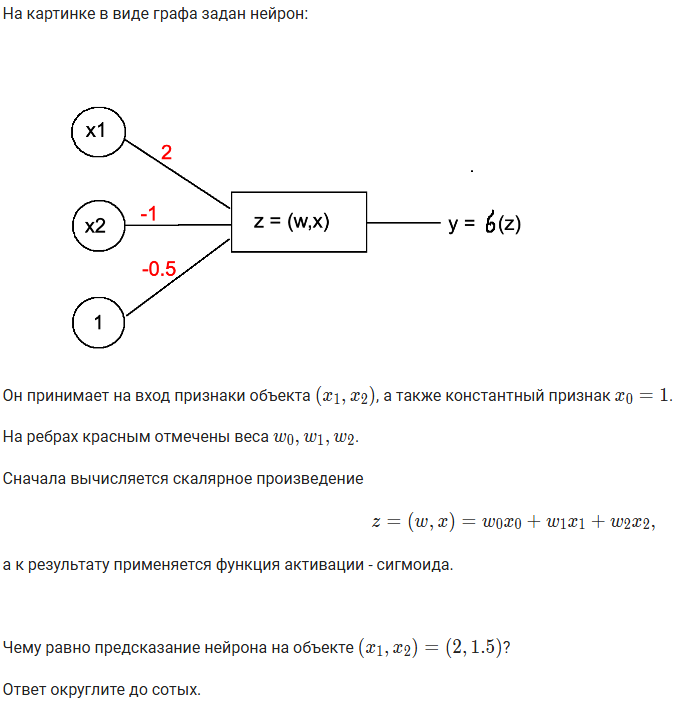

In [237]:
import numpy as np
x = [1, 2, 1.5]
w = [-0.5, 2, -1]
z = np.sum(np.array(x) * np.array(w))
sigmoid = 1 / (1 + np.exp(-z))
print('z = ', z)
print('sigma = ', round(sigmoid,2))

z =  2.0
sigma =  0.88


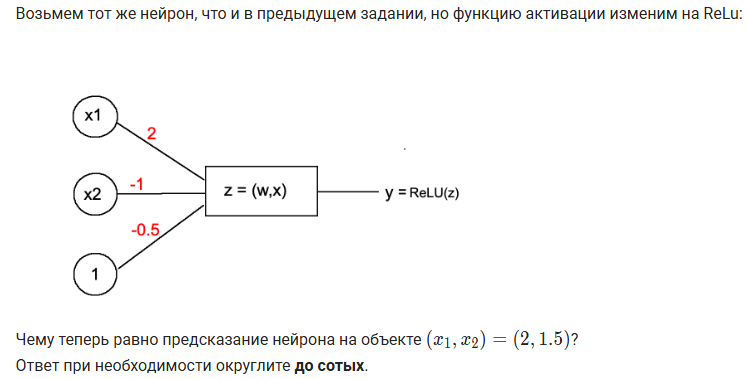

In [238]:
x = [1, 2, 1.5]
w = [-0.5, 2, -1]
z = np.sum(np.array(x) * np.array(w))
relu = max(0, z)
print('z = ', z)
print('relu = ', round(relu,2))

z =  2.0
relu =  2.0


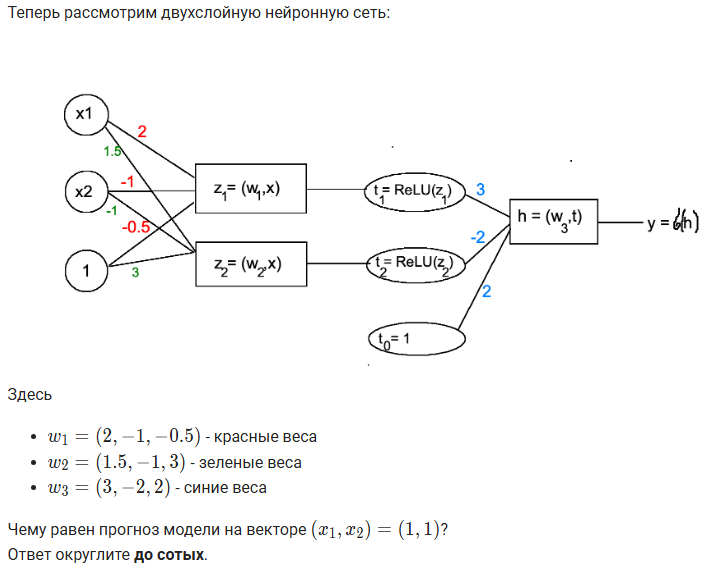

In [239]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
relu = lambda x: max(0, x)

w1 = np.array([2, -1, -0.5])
w2 = np.array([1.5, -1, 3])
w3 = np.array([3, -2, 2])

x = np.array([1, 1, 1])

z1 = np.sum(w1 * x)
print('z1 =', z1)
# или так
z2 = w2 @ x
print('z2 =', z2)

h = np.array((relu(z1), relu(z2), 1)) @ w3
print('h = ', h)

y = sigmoid(h)
print('y = ', round(y, 2))

z1 = 0.5
z2 = 3.5
h =  -3.5
y =  0.03


## Домашнее задание

В этом домашнем задании вы подготовитесь к более сложным модулям. Сейчас вы:

* потренируетесь реализовывать простейшие логические операции в python

* научитесь реализовывать сигма-функцию и вычислять от нее производную

* научитесь конструировать графы вычисления в python

**Задание 1 (логические операции)**

Реализуйте три функции по [формулам](https://stepik.org/lesson/1075284/step/6?unit=1085378) из урока:  

* `logical_and(x1,x2)`

* `logical_or(x1,x2)`

* `logical_xor(x1,x2)`



In [240]:
# your code here

logical_and = lambda x1, x2: int(np.sign(x1 + x2 - 1.5) > 0)
logical_or = lambda x1, x2: int(np.sign(x1 + x2 - 0.5) > 0)
# logical_xor = lambda x1, x2: int(logical_and(x1, x2) and logical_or(x1, x2) > 0)
logical_xor = lambda x1, x2: int(np.sign(x1 + x2 - 1.5) != np.sign(x1 + x2 - 0.5))
not_x = lambda x: 1- x

## Quiz

Используя написанные функции, вычислите:

1) `x1 AND not(x2)` при `x1=0, x2=1`

2) `x1 XOR (not(x2) OR x1)` при `x1=x2=0`

Здесь `not(x) = 1-x`

In [241]:
# your code here

x1 = 0
x2 = 1

res1 = logical_and(x1, not_x(x2))
print(res1)

x1 = 0
x2 = 0

res2 = logical_xor(x1, logical_or(not_x(x2), x1))
print(res2)

0
1


**Задание 2 (сигмоида)**

Реализуйте функцию `sigmoid(x)`, вычисляющую значение сигмоиды в точке `x`.

## Quiz

Чему равно значение `sigmoid(2)`? Ответ округлите до сотых.

In [242]:
import numpy as np

# your code here

sigmoid = lambda x: 1 / (1 + np.exp(-x))

sigmoid(2)

0.8807970779778823

## Quiz

В дальнейшем для обучения нейронных сетей нам понадобится умение вычислять производную сигма-функции. Чему она равна?

(варианты ответа на Stepik)

Реализуйте функцию `diff_sigmoid(x)`, вычисляющую производную сигма-функции в точке `x`.

## Quiz

Чему равно значение $\sigma'(2)$? Ответ округлите до тысячных.

In [243]:
# your code here

diff_sigmoid = lambda x: sigmoid(x) * (1 - sigmoid(x))
res = diff_sigmoid(2)

round(res, 3)

0.105

In [244]:
import sympy as sp

x = sp.Symbol('x')
expr = 1 / (1 + sp.exp(-x))
display(expr)
expr_diff = sp.diff(expr, x)
display(expr_diff)

round(expr_diff.subs(x, 2), 3)

1/(1 + exp(-x))

exp(-x)/(1 + exp(-x))**2

0.105

In [245]:
func_expr_diff = lambda q: expr.diff(x).subs(x, q)
round(func_expr_diff(2), 3)

0.105

**Задание 3 (графы вычислений)**

Реализуйте функцию `one_layer_graph(x1,x2)`, делающую прогноз по схеме, изображенной на рисунке.

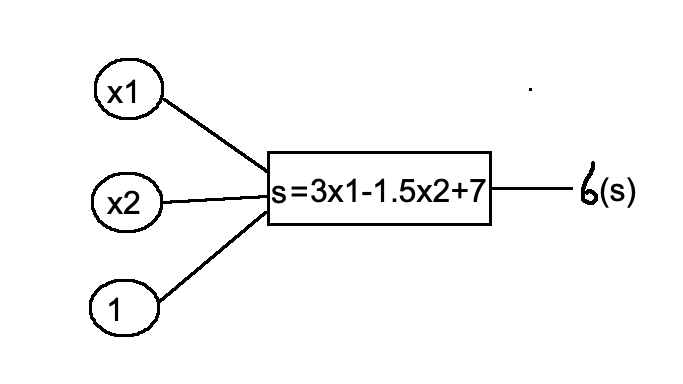

## Quiz

Чему равно значение `one_layer_graph(3,4)`? Ответ округлите до ближайшего целого числа.

In [246]:
# your code here
one_layer_graph = lambda x1, x2, x3=1: sigmoid(3*x1 - 1.5*x2 + 7)

res = one_layer_graph(3,4)
round(res)

1

## Задание

Реализуйте функцию `two_layer_graph(x1,x2)`, делающую прогноз по схеме, изображенной на рисунке.

Здесь $\Sigma$ каждого цвета - сумма признаков с весами соответствующего цвета.

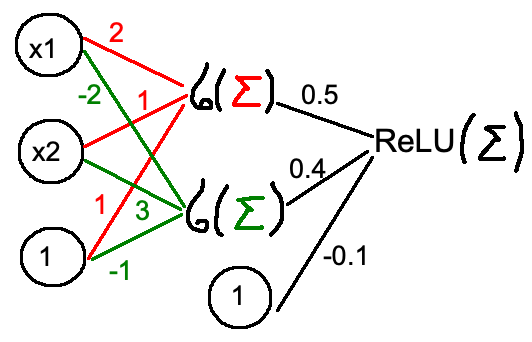

## Quiz

Чему равно значение `two_layer_graph(3,4)`? Ответ округлите до десятых.

In [247]:
# your code here

def two_layer_graph(x1, x2, x3=1):
    w1 = np.array([2, 1, 1])
    w2 = np.array([-2, 3, -1])
    w3 = np.array([0.5, 0.4, -0.1])
    x = np.array([x1, x2, x3])
    z1 = x @ w1
    z2 = x @ w2

    sigma = np.array([sigmoid(z1), sigmoid(z2), 1])

    relu = max(0, w3 @ sigma)
    return relu

res = two_layer_graph(3,4)
print(round(res, 1))



def relu(x):
    return max(0, x)

def two_layer_graph(x1,x2):
    s1 = 2 * x1 + 1 * x2 + 1
    s2 = -2 * x1 + 3 * x2 - 1
    res = 0.5 * sigmoid(s1) + 0.4 * sigmoid(s2) - 0.1

    return relu(res)

res = two_layer_graph(3,4)
print(round(res, 1))

0.8
0.8


# 3.7 Домашнее задание

Градиентный спуск и Momentum своими руками.

## Quiz

Найдите минимум функции вручную (на бумажке):

$f(x) = x^2 - 30x + 1$

В ответ запишите точку минимума, округленную до сотых.

Используем библиотеку sympy для того, чтобы вычислять производные различных функций (при помощи `sp.diff`).

Ниже реализован метод одномерного градиентного спуска для нахождения минимума функции `f(x)`.

In [248]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.Symbol('x')

При помощи градиентного спуска найдем минимум функции
$f(x) = x^3 - 3x^2 + 4$.

In [249]:
def f(x):
  return x**3 - 3*x**2 + 4

In [250]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start
    df_x = sp.diff(f(x)) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
      trace.append(x_new)

      if abs(x_new - x_curr) < epsilon:
        return x_curr, trace

      x_curr = x_new

    return x_curr, trace

Визуализируем процесс поиска минимума (красные точки) и найденный минимум (зеленая точка).

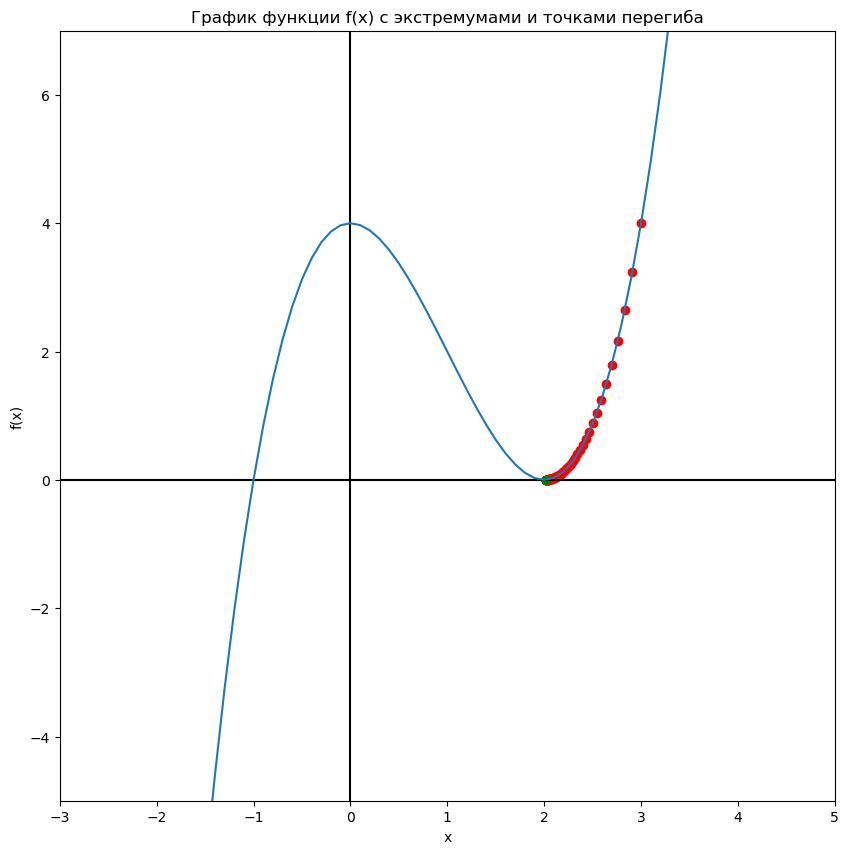

In [251]:
xmin, trace = gradient_descent(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show();

## Quiz

Запишите в ответ точку минимума, округленную до сотых.

In [252]:
# ваш код здесь  
round(xmin, 2)

2.02

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара:

* добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции)

* добавьте в возвращаемые значения метода число произведенных методом итераций

In [253]:
# не забудьте добавить в возвращаемые значения функции число произведенных методом итераций

def gradient_descent_modified(x_start, learning_rate, epsilon, num_iterations, delta=1e-3):
    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    for _ in range(num_iterations):
        derivative = df_x.subs(x, x_curr)

        # добавьте условие (if) с модификацией здесь
        if derivative < delta:
            break

        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            break

        x_curr = x_new

    return x_curr, trace, len(trace) -1

## Quiz

Визуализируйте результат работы метода (как в коде выше) и с теми же гиперпараметрами.

Также выведите на экран число произведенных итераций.
Сколько итераций произвел метод до остановки?

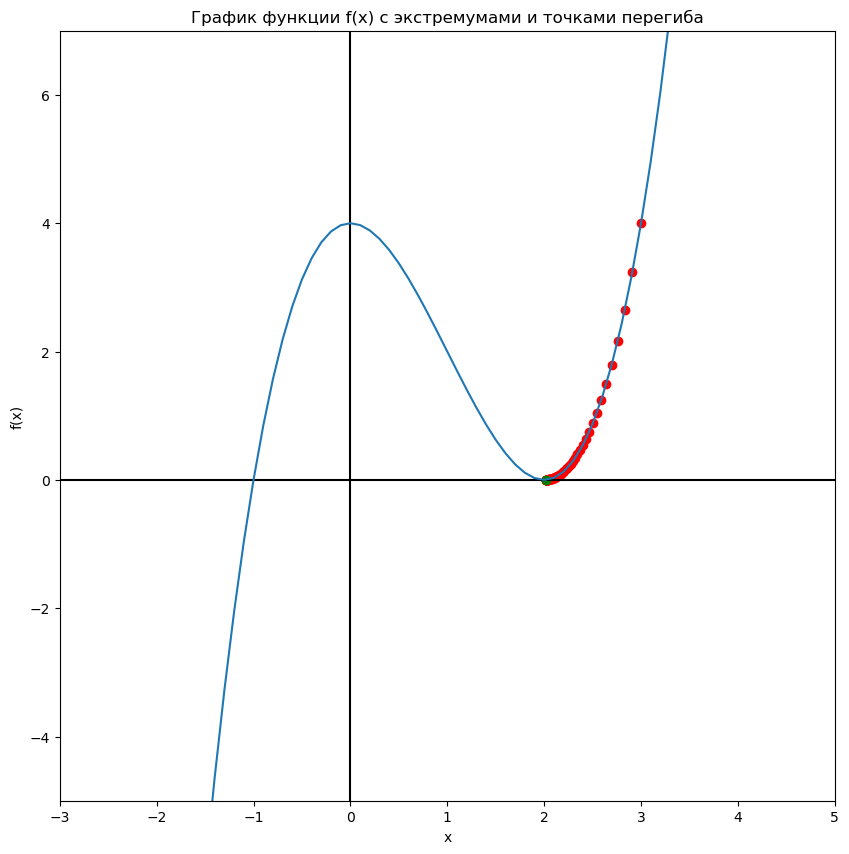

In [254]:
xmin, trace, num_iter = gradient_descent_modified(3, 0.01, 0.001, 100)

x_values = [x for x in np.arange(-3, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-3, 5])
plt.ylim([-5, 7])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show();

In [255]:
num_iter

61

## Quiz

При каком начальном приближении модифицированная функция с гиперпараметрами
* `learning_rate = 0.001`
* `epsilon = 0.001`
* `num_iterations = 100`
* `delta = 1e-3`

верно находит глобальный минимум функции
$f(x) = (x+5)*(x+2)*(x-3)*(x-4)$?

Варианты ответа:

a) -1

b) 1

c) 3

d) 7

In [256]:
def f(x):
  return (x+5)*(x+2)*(x-3)*(x-4)

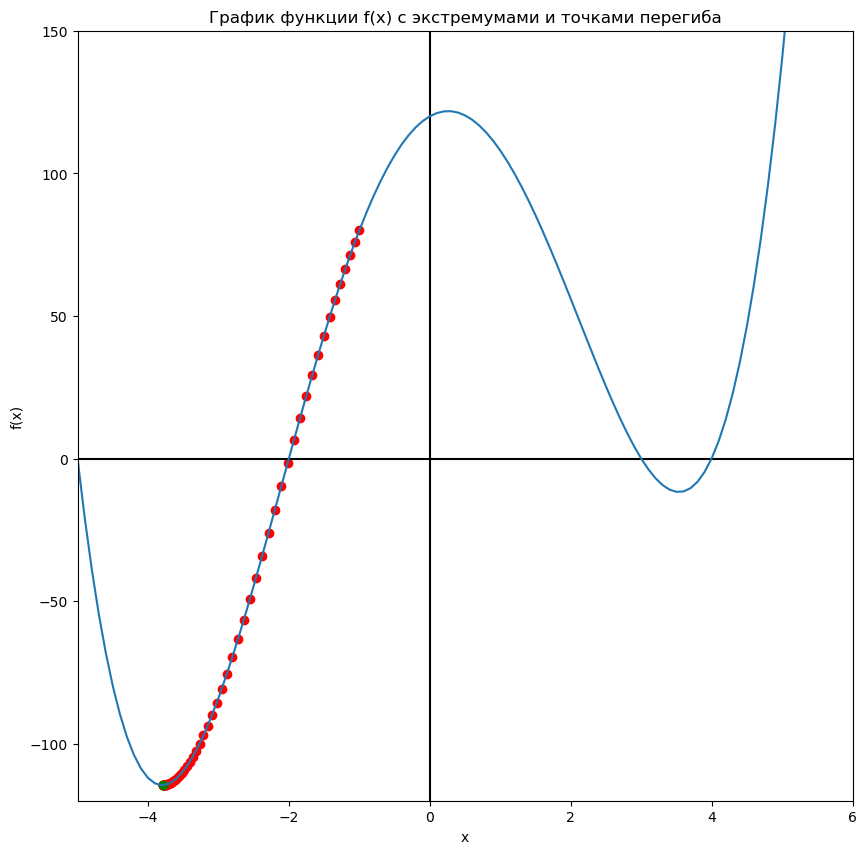

In [257]:
xmin, trace, num_iter = gradient_descent_modified(-1, 0.001, 0.001, 100)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show();

In [258]:
xmin

-3.78956142638505

Реализуйте модификацию метода градиентного спуска - Momentum:

$$x_{new} = x_{old} - h_{new},$$
$$h_{new} = \alpha\cdot h_{old} + \eta\cdot f'(x_{old})$$

В коде ниже
* $\eta$ обозначена как `learning_rate`
* $\alpha$ обозначена как `momentum`.

In [261]:
def momentum_method(x_start, learning_rate, epsilon, num_iterations, momentum, delta=0.01):

    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    h_curr = 0
    h_trace = []
    h_trace.append(h_curr)

    for i in range(1, num_iterations):

        h_new = momentum * h_curr + learning_rate * df_x.subs(x, x_curr)
        x_new = x_curr - h_new

        trace.append(x_new)
        h_trace.append(h_new)

        if (abs(x_new - x_curr) < epsilon) or (abs(df_x.subs(x, x_new)) < delta):
            return x_curr, trace, len(trace) - 1

        x_curr = x_new
        h_curr = h_new


    return x_curr, trace, len(trace) - 1

Проверьте, решает ли Momentum проблему застревания в локальном минимуме?

Используйте гиперпараметры из запуска выше и возьмите
* `x_start = 7`
* `momentum = 0.2`

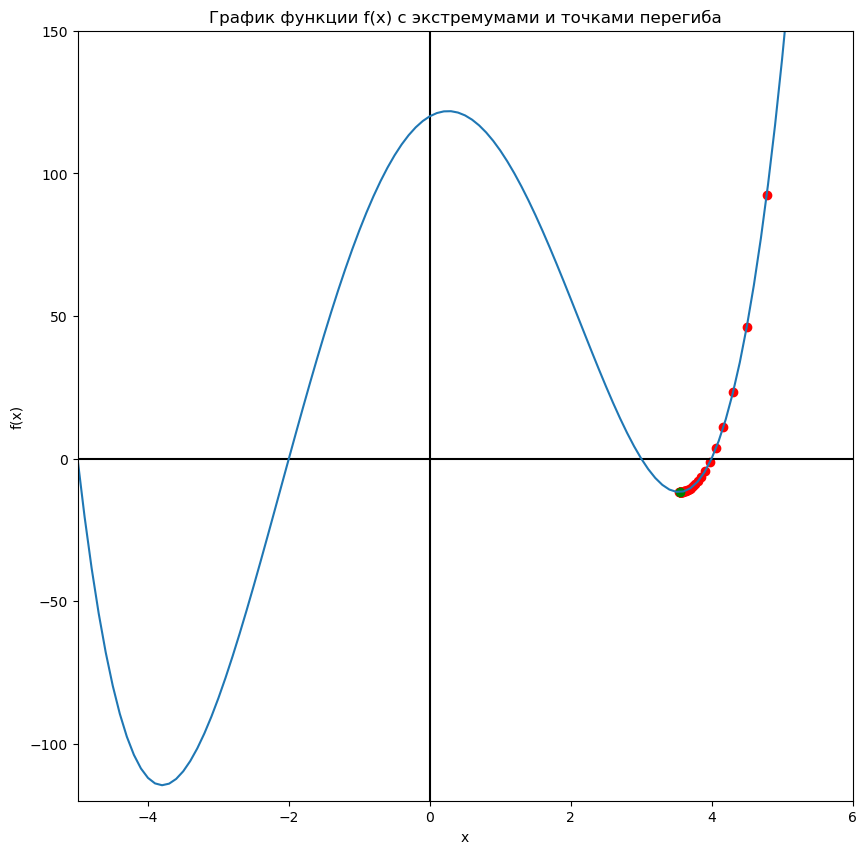

In [263]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, 0.2)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show();

## Quiz

Выведите на экран значение найденной точки минимума с заданными гиперпараметрами, округленное до сотых.

In [265]:
round(xmin, 2)

3.54

Теперь запустите метод с гиперпараметрами:

* `x_start = 7`
* `momentum = 0.8`.

Остальные значения гиперпараметров оставьте как и раньше.

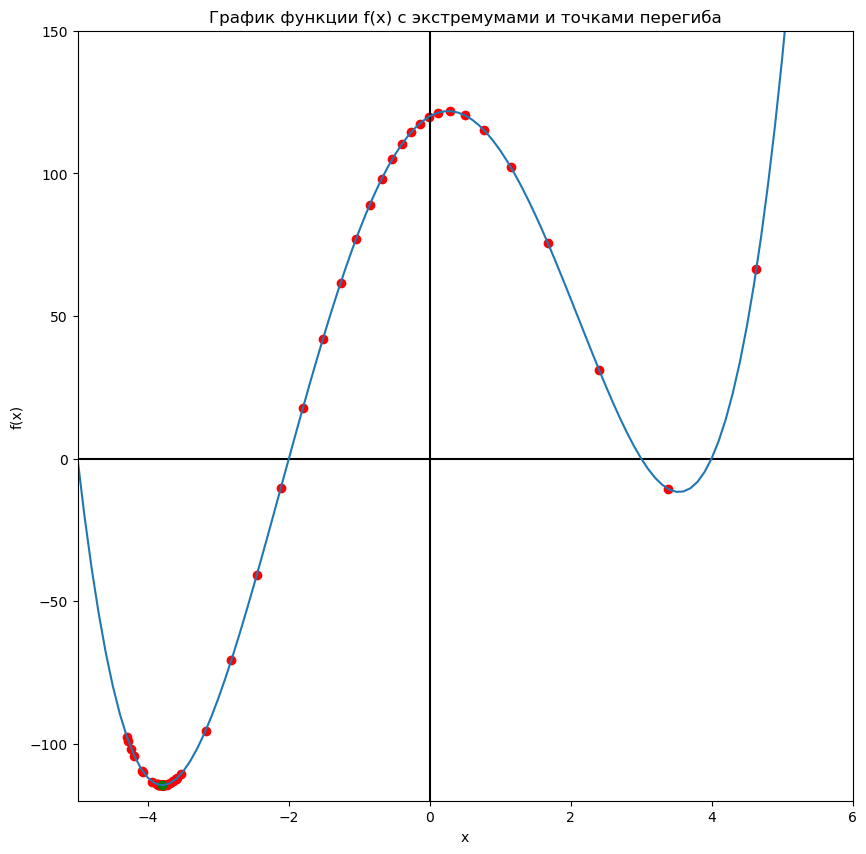

In [267]:
xmin, trace, num_iter = momentum_method(7, 0.001, 0.001, 100, 0.8)

x_values = [x for x in np.arange(-5, 6, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(10,10))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)

plt.xlim([-5, 6])
plt.ylim([-120, 150])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')

trace_values = [f(x) for x in trace]
plt.scatter(trace, trace_values, c='red')
plt.scatter([xmin],[f(xmin)], c='green')

plt.show();

## Quiz

Выведите на экран значение найденной точки минимума с заданными гиперпараметрами, округленное до десятых.

In [268]:
round(xmin, 1)

-3.8